# Compositing Array DataSources

*Author: Creare* <br>
*Date: April 01 2020* <br>

**Keywords**: podpac, DataSource, interpolation, regridding, compositing

## Overview

Reference tutorial for compositing two data sources together into a single dataset..

### Prerequisites

- Python 2.7 or above
- [`podpac[datatype]`](https://podpac.org/install.html#install)
- *Review the [README.md](../../README.md) and [jupyter-tutorial.ipynb](../jupyter-tutorial.ipynb) for additional info on using jupyter notebooks*

### See Also

- [0-concepts/node.ipynb](../0-concepts/node.ipynb): PODPAC Node reference
- [0-concepts/coordinates.ipynb](../0-concepts/coordinates.ipynb): PODPAC Coordinates reference
- [1-reading-data/array_data.ipynb](../1-reading-data/array-data.ipynb): PODPAC Array DataSource

In [1]:
# For interactive plots, comment the next line
%pylab inline
# For interactive plots, uncomment the next line
# %pylab ipympl

Populating the interactive namespace from numpy and matplotlib


# Example of two datasources with different coverage

This notebook shows how to composite two data sources together into a single dataset.

This is useful when:

* You have two datasources that have different coverages and resolutions
* Your datasource is stored in multiple files (tiled)

The `podpac.datalib.SMAP` node is an example of a compositor.

## Create two demo raster data sources 

In [2]:
import podpac
from podpac import crange

# Create high resolution datasource with limited coverage
high_res = podpac.data.Array(source=np.linspace(0., 1., 101*81).reshape(101, 81),
                             coordinates=podpac.Coordinates([crange(-25, 25, 0.5, 'lat'),
                                                                    crange(-20, 20, 0.5, 'lon')])
                            )
# Add a few nans to the high resolution source
high_res.source[40:60, 40:60] = np.nan

# Create lower resolution datasource with larger coverage
low_res =  podpac.data.Array(source=np.random.rand(21, 16),
                             coordinates=podpac.Coordinates([crange(-40, 40, 4.0, 'lat'),
                                                                    crange(-30, 30, 4.0, 'lon')])
                            )

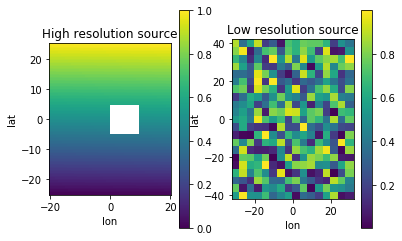

In [3]:
# Plot data
subplot(121)
high_res.eval(high_res.coordinates).plot()
title("High resolution source"); _ = axis('scaled')

subplot(122)
low_res.eval(low_res.coordinates).plot()
title("Low resolution source"); _ = axis('scaled')
pass

# Composite the two data sources together

In [4]:
# Create a "compositor" that contains both the high_res and low_res sources
composite = podpac.compositor.OrderedCompositor(
    sources=[high_res, low_res],  # Order matters, high_res data will take priority over low_res
    interpolation='bilinear'
)

# Evaluate compsitor at arbitrary raster grid

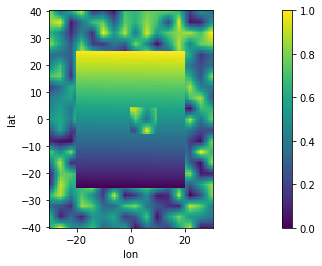

In [5]:
# Create coordinates
coords = podpac.Coordinates([crange(-40, 40, 0.5, 'lat'),
                             crange(-30, 30, 0.5, 'lon')])

# Evaluate node
o = composite.eval(coords)

# Plot
o.plot(); axis('scaled')
pass